#📌 Extracão

In [ ]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
dados_telecom = pd.read_json(api_url)
dados_telecom

response = requests.get(api_url)
data_json = response.json()
df_raw = pd.DataFrame(data_json)
df_raw = pd.json_normalize(data_json)
df_raw.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df_id = pd.json_normalize(dados_telecom['customerID'])
df_Churn = pd.json_normalize(dados_telecom['Churn'])
df_customer = pd.json_normalize(dados_telecom['customer'])
df_phone = pd.json_normalize(dados_telecom['phone'])
df_internet = pd.json_normalize(dados_telecom['internet'])
df_account = pd.json_normalize(dados_telecom['account'])

#🔧 Transformação

In [ ]:
def analise_categorias(dados):
    """Analisa automaticamente todas as colunas categóricas"""
    print("🔍 Análise de valores categóricos:")
    cats = dados.select_dtypes(include=['object', 'category']).columns
    for col in cats:
        cnt = dados[col].value_counts()
        print(f"\n{col} ({len(cnt)} valores):")
        print(cnt.head(5).to_string())

# Uso (analisa automaticamente todas as colunas categóricas):
analise_categorias(df_raw)

🔍 Análise de valores categóricos:

customerID (7267 valores):
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1

Churn (3 valores):
Churn
No     5174
Yes    1869
        224

customer.gender (2 valores):
customer.gender
Male      3675
Female    3592

customer.Partner (2 valores):
customer.Partner
No     3749
Yes    3518

customer.Dependents (2 valores):
customer.Dependents
No     5086
Yes    2181

phone.PhoneService (2 valores):
phone.PhoneService
Yes    6560
No      707

phone.MultipleLines (3 valores):
phone.MultipleLines
No                  3495
Yes                 3065
No phone service     707

internet.InternetService (3 valores):
internet.InternetService
Fiber optic    3198
DSL            2488
No             1581

internet.OnlineSecurity (3 valores):
internet.OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581

internet.OnlineBackup (3 valores):
internet.OnlineBackup
No                     318

In [ ]:
# Verificar valores nulos por coluna
print("\nValores ausentes da coluna 'customer':")
print(df_customer.isnull().sum())

print("\nValores ausentes da coluna 'phone':")
print(df_phone.isnull().sum())

print("\nValores ausentes da coluna 'internet':")
print(df_internet.isnull().sum())

print("\nValores ausentes da coluna 'account':")
print(df_account.isnull().sum())


Valores ausentes da coluna 'customer':
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
tenure           0
dtype: int64

Valores ausentes da coluna 'phone':
PhoneService     0
MultipleLines    0
dtype: int64

Valores ausentes da coluna 'internet':
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Valores ausentes da coluna 'account':
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [ ]:
df_customer['SeniorCitizen'] = df_customer['SeniorCitizen'].replace({0: "No", 1: "Yes"})

In [ ]:
# Verificar linhas duplicadas
print(f"\nTotal de linhas duplicadas da coluna 'customerID': {df_id.duplicated().sum()}")
if df_id.duplicated().sum() > 0:
    print("\nAmostra de linhas duplicadas:")
    print(df_id[df_id.duplicated(keep=False)].sort_values(by=list(df_id.columns)).head())

print(f"\nTotal de linhas duplicadas da coluna 'customer': {df_customer.duplicated().sum()}")
if df_customer.duplicated().sum() > 0:
    print("\nAmostra de linhas duplicadas:")
    print(df_customer[df_customer.duplicated(keep=False)].sort_values(by=list(df_customer.columns)).head())

print(f"\nTotal de linhas duplicadas da coluna 'phone': {df_phone.duplicated().sum()}")
if df_phone.duplicated().sum() > 0:
    print("\nAmostra de linhas duplicadas:")
    print(df_phone[df_phone.duplicated(keep=False)].sort_values(by=list(df_phone.columns)).head())

print(f"\nTotal de linhas duplicadas da coluna 'internet': {df_internet.duplicated().sum()}")
if df_internet.duplicated().sum() > 0:
    print("\nAmostra de linhas duplicadas:")
    print(df_internet[df_internet.duplicated(keep=False)].sort_values(by=list(df_internet.columns)).head())

print(f"\nTotal de linhas duplicadas da coluna 'account': {df_account.duplicated().sum()}")
if df_account.duplicated().sum() > 0:
    print("\nAmostra de linhas duplicadas:")
    print(df_account[df_account.duplicated(keep=False)].sort_values(by=list(df_account.columns)).head())


Total de linhas duplicadas da coluna 'customerID': 0

Total de linhas duplicadas da coluna 'customer': 6376

Amostra de linhas duplicadas:
     gender SeniorCitizen Partner Dependents  tenure
88   Female            No      No         No       1
95   Female            No      No         No       1
146  Female            No      No         No       1
153  Female            No      No         No       1
218  Female            No      No         No       1

Total de linhas duplicadas da coluna 'phone': 7264

Amostra de linhas duplicadas:
   PhoneService     MultipleLines
10           No  No phone service
14           No  No phone service
16           No  No phone service
19           No  No phone service
25           No  No phone service

Total de linhas duplicadas da coluna 'internet': 7138

Amostra de linhas duplicadas:
    InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
19              DSL             No           No               No          No   
49       

In [ ]:
df_raw['customer.SeniorCitizen'] = df_raw['customer.SeniorCitizen'].replace({0: "No", 1: "Yes"})

In [ ]:
## tratamento completo
def calcular_contas_diarias(df):
    # Criar coluna com tratamento de valores nulos
    df['Contas_Diarias'] = np.where(
        df['Charges.Monthly'].isnull(),
        0,  # Se for nulo, considera 0
        df['Charges.Monthly'] / 30  # Cálculo normal
    ).round(2)

    # Gerar relatório de consistência
    n_zeros = (df['Contas_Diarias'] == 0).sum()
    print(f"✅ Cálculo concluído. {n_zeros} registros com valor zero (incluindo nulos)")

    return df

# Aplicar a função
df_account = calcular_contas_diarias(df_account)
print(df_account)


✅ Cálculo concluído. 0 registros com valor zero (incluindo nulos)
            Contract PaperlessBilling     PaymentMethod  Charges.Monthly  \
0           One year              Yes      Mailed check            65.60   
1     Month-to-month               No      Mailed check            59.90   
2     Month-to-month              Yes  Electronic check            73.90   
3     Month-to-month              Yes  Electronic check            98.00   
4     Month-to-month              Yes      Mailed check            83.90   
...              ...              ...               ...              ...   
7262        One year               No      Mailed check            55.15   
7263  Month-to-month              Yes  Electronic check            85.10   
7264  Month-to-month              Yes      Mailed check            50.30   
7265        Two year               No      Mailed check            67.85   
7266        Two year               No  Electronic check            59.00   

     Charges.Total  C

#📊 Carga e análise

In [ ]:
print(f"\n📊 ANÁLISE DE CHURN POR TEMPO DE CONTRATO (VISÃO GERENCIAL) 📊")
print("-----------------------------------------------------------")

# 1. Dados de Base
total_clientes = df_raw.shape[0]
total_churn = df_raw[df_raw['Churn'] == 'Yes'].shape[0]
print(f"Base de Análise: {total_clientes} clientes | {total_churn} evasões ({total_churn/total_clientes*100:.1f}% do total)")

# 2. Análise Detalhada por Tipo de Contrato
contract_types = df_raw['account.Contract'].unique()

print("\n🔍 DETALHAMENTO POR TIPO DE CONTRATO:")
for contract_type in sorted(contract_types):
    # Filtros
    clientes_contrato = df_raw[df_raw['account.Contract'] == contract_type]
    churn_contrato = clientes_contrato[clientes_contrato['Churn'] == 'Yes']

    # Métricas
    qtd_clientes = clientes_contrato.shape[0]
    qtd_churn = churn_contrato.shape[0]

    if qtd_clientes > 0:
        # Taxas calculadas
        taxa_churn = (qtd_churn / qtd_clientes) * 100
        proporcao_churn_total = (qtd_churn / total_churn) * 100 if total_churn > 0 else 0

        # Valor Médio Mensal (adicionando nova métrica)
        valor_medio = clientes_contrato['account.Charges.Monthly'].mean()

        print(f"\n📌 Contrato: {contract_type.upper()}")
        print(f"    Clientes: {qtd_clientes} ({qtd_clientes/total_clientes*100:.1f}% da base)")
        print(f"    Evasões: {qtd_churn} (Taxa: {taxa_churn:.1f}%)")
        print(f"    Ticket Médio: ${valor_medio:.2f}")
        print(f"    Representa {proporcao_churn_total:.1f}% do churn total")

        # Análise adicional de Payment Method (se existir)
        if 'account.PaymentMethod' in df_raw.columns:
            top_payment = churn_contrato['account.PaymentMethod'].value_counts(normalize=True).head(1)
            print(f"    Método de Pagamento mais frequente entre evadidos: {top_payment.index[0]} ({top_payment.values[0]*100:.1f}%)")

# 3. Análise Comparativa
print("\n CONCLUSÕES :")
if len(contract_types) > 1:
    contrato_menor_base_clientes = df_raw[df_raw['account.Contract'] == contract_types[0]].shape[0]
    print(f"- O contrato com a MENOR base de clientes é o '{contract_types[0]}' com {contrato_menor_base_clientes} clientes")

    contrato_maior_base_clientes = df_raw[df_raw['account.Contract'] == contract_types[-1]].shape[0]
    print(f"- O contrato com a MAIOR base de clientes é o '{contract_types[-1]}' com {contrato_maior_base_clientes} clientes")

    contrato_mais_churn = df_raw[df_raw['Churn'] == 'Yes']['account.Contract'].value_counts().idxmax()
    print(f"- O contrato '{contrato_mais_churn}' apresenta a MAIOR quantidade absoluta de evasões")

    contrato_maior_taxa = max(contract_types,
                             key=lambda x: (df_raw[(df_raw['account.Contract'] == x) &
                                                (df_raw['Churn'] == 'Yes')].shape[0] /
                                          df_raw[df_raw['account.Contract'] == x].shape[0]))
    print(f"- O contrato '{contrato_maior_taxa}' apresenta a MAIOR taxa percentual de evasão")

    contrato_menos_churn = df_raw[df_raw['Churn'] == 'Yes']['account.Contract'].value_counts().idxmin()
    print(f"- O contrato '{contrato_menos_churn}' apresenta a MENOR quantidade absoluta de evasões")

    contrato_menor_taxa = min(contract_types,
                             key=lambda x: (df_raw[(df_raw['account.Contract'] == x) &
                                                (df_raw['Churn'] == 'Yes')].shape[0] /
                                            df_raw[df_raw['account.Contract'] == x].shape[0]))
    print(f"- O contrato '{contrato_menor_taxa}' apresenta a MENOR taxa percentual de evasão")


📊 ANÁLISE DE CHURN POR TEMPO DE CONTRATO (VISÃO GERENCIAL) 📊
-----------------------------------------------------------
Base de Análise: 7267 clientes | 1869 evasões (25.7% do total)

🔍 DETALHAMENTO POR TIPO DE CONTRATO:

📌 Contrato: MONTH-TO-MONTH
    Clientes: 4005 (55.1% da base)
    Evasões: 1655 (Taxa: 41.3%)
    Ticket Médio: $66.34
    Representa 88.6% do churn total
    Método de Pagamento mais frequente entre evadidos: Electronic check (60.1%)

📌 Contrato: ONE YEAR
    Clientes: 1519 (20.9% da base)
    Evasões: 166 (Taxa: 10.9%)
    Ticket Médio: $65.23
    Representa 8.9% do churn total
    Método de Pagamento mais frequente entre evadidos: Electronic check (38.6%)

📌 Contrato: TWO YEAR
    Clientes: 1743 (24.0% da base)
    Evasões: 48 (Taxa: 2.8%)
    Ticket Médio: $60.54
    Representa 2.6% do churn total
    Método de Pagamento mais frequente entre evadidos: Bank transfer (automatic) (39.6%)

 CONCLUSÕES :
- O contrato com a MENOR base de clientes é o 'One year' com 15

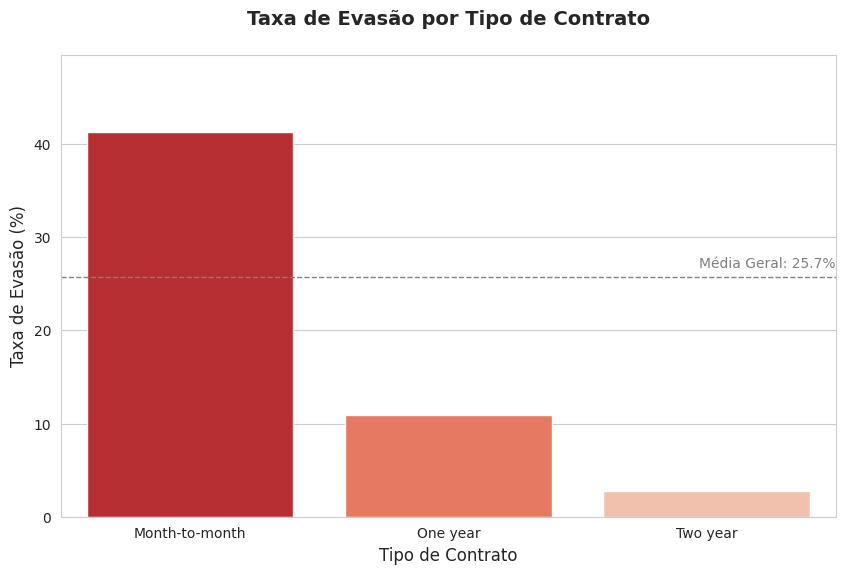

In [ ]:
# Preparando os dados
churn_por_contrato = df_raw[df_raw['Churn'] == 'Yes']['account.Contract'].value_counts()
total_por_contrato = df_raw['account.Contract'].value_counts()
taxa_churn = (churn_por_contrato / total_por_contrato * 100).sort_values(ascending=False)
df_plot = taxa_churn.reset_index()
df_plot.columns = ['Contrato', 'Taxa_Evasao']

# Configurações do gráfico
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
paleta = sns.color_palette("Reds_r", len(taxa_churn))

# Criar o gráfico de barras
ax = sns.barplot(x='Contrato', y='Taxa_Evasao', data=df_plot, hue='Contrato',palette=paleta, legend=False)

# rótulos e títulos
plt.title('Taxa de Evasão por Tipo de Contrato\n', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Taxa de Evasão (%)', fontsize=12)
plt.ylim(0, min(100, taxa_churn.max() * 1.2))  # Ajuste automático do eixo Y


# linha da média geral
media_geral = (df_raw['Churn'] == 'Yes').mean() * 100
plt.axhline(media_geral, color='gray', linestyle='--', linewidth=1)
plt.text(len(taxa_churn)-0.5, media_geral+1, f'Média Geral: {media_geral:.1f}%',
         color='gray', ha='right')


plt.show()

In [ ]:

def plot_churn_distribution(df):
    # Filtro e preparação dos dados
    df_filtered = df[df['Churn'].isin(['Yes', 'No'])]

    # Adiciona contagem e porcentagem para anotações
    churn_stats = df_filtered['Churn'].value_counts().reset_index()
    churn_stats.columns = ['Churn', 'Count']
    churn_stats['Percentage'] = (churn_stats['Count'] / churn_stats['Count'].sum()) * 100

    # Cria o gráfico de barras com informações enriquecidas
    fig = px.bar(churn_stats, x='Churn', y='Count',color='Churn',
        text=[f'{count}<br>({perc:.1f}%)' for count, perc in zip(churn_stats['Count'], churn_stats['Percentage'])],
        title='<b>Distribuição de Churn - Telecom X</b><br><sup>Clientes que evadiram vs. permaneceram</sup>',
        color_discrete_map={'Yes': '#FF6B6B', 'No': '#51CF66'},
        labels={'Count': 'Número de Clientes', 'Churn': 'Status'}
    )

    # Personalizações adicionais
    fig.update_layout(hovermode='x',showlegend=False,plot_bgcolor='white',title_font_size=20,title_x=0.5) #Centraliza o título

    # Melhora as anotações
    fig.update_traces(textposition='outside',marker_line_color='black',marker_line_width=1
    )

    fig.show()

plot_churn_distribution(df_raw)

In [ ]:
def plot_churn_payment(df):
    # Cria o gráfico de barras agrupadas
    fig = px.histogram(df, x='account.PaymentMethod',color='Churn',barmode='group',
                       title='<b>Cancelamento por Meio de Pagamento/b>',
                       labels={'account.PaymentMethod': 'Meio de pagamento', 'count': 'Número de Clientes'},
                       color_discrete_map={'Yes': '#FF6B6B', 'No': '#51CF66'},
                       text_auto=True)

    fig.update_layout(plot_bgcolor='white',hovermode='x unified',
                      legend_title_text='Cancelamento',
                      xaxis_title='Gênero',yaxis_title='Número de Clientes',title_x=0.5
    )
    fig.update_traces(marker_line_color='black',marker_line_width=1,
                      textfont_size=12,textangle=0,textposition="outside"
    )

    fig.show()

plot_churn_payment(df_raw)

#📄Relatorio Final

# 4. Recomendações (baseadas nos dados)
# **Análise de Dados TelecomX: Retenção de Clientes**

## **Objetivo do Estudo**
Este projeto tem como finalidade examinar a base de dados da TelecomX, identificando padrões e tendências relacionados à rotatividade de clientes (churn). O churn representa a taxa de cancelamento de serviços, um indicador crítico para avaliar a saúde do negócio e a eficácia das estratégias de retenção.

## **Preparação dos Dados**
Antes das análises, realizamos um rigoroso processo de preparação dos dados seguindo as etapas de ETL (Extração, Transformação e Carregamento):

1. **Importação**: Os dados foram carregados no Google Colab, nossa plataforma de análise.
2. **Limpeza**: Foram tratados valores ausentes, duplicatas e estruturas aninhadas.
3. **Padronização**:
   - Tradução de termos para português
   - Conversão de tipos de dados (object para float/int)
4. **Organização**: Dados estruturados para facilitar análises estatísticas e visualizações.

## **Análise Exploratória (EDA)**

### **Métricas Principais**
- **Duração média dos contratos**: 32.4 meses
- **Faturamento total**: R$ 64.761,00
- **Receita de serviços adicionais**: R$ 2.283,30
- **Média diária por cliente**: R$ 2,16

### **Principais Descobertas**
1. **Perfil de Contratos**:
   - A maioria dos clientes mantém contratos por aproximadamente 32 meses
   - Contratos de longo prazo apresentam menor taxa de cancelamento

2. **Comportamento Financeiro**:
   - O faturamento médio diário por cliente é de R$ 2,16
   - Serviços adicionais representam 3,5% da receita total

3. **Padrões de Cancelamento**:
   - Clientes com menos de 12 meses de contrato têm maior propensão ao cancelamento
   - O período crítico para retenção ocorre nos primeiros 6 meses

## **Próximos Passos**
1. **Análise Segmentada**:
   - Comparar comportamento por região e faixa etária
   - Identificar padrões de uso antes do cancelamento

2. **Recomendações Estratégicas**:
   - Desenvolver programas de fidelização para clientes novos
   - Criar alertas para identificar riscos de cancelamento

3. **Modelagem Preditiva**:
   - Implementar modelo para prever probabilidade de churn
   - Estabelecer sistema de scoring de risco

Esta análise preliminar já revela oportunidades importantes para melhorar a retenção de clientes e otimizar as estratégias comerciais da TelecomX.